In [1]:
import logging 

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

mpl.rc('axes',unicode_minus =False)

In [3]:
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.grid'] = False

In [6]:
import mglearn

from sklearn.model_selection import train_test_split

# Ensemble (앙상블)

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [9]:
X,y = make_moons(n_samples = 100, noise=.25, random_state=3)
X_tr, X_te, y_tr, y_te = train_test_split(
    X,y, stratify=y, random_state=42
)

In [11]:
forest = RandomForestClassifier(n_estimators=5, random_state = 2).fit(X_tr,y_tr)

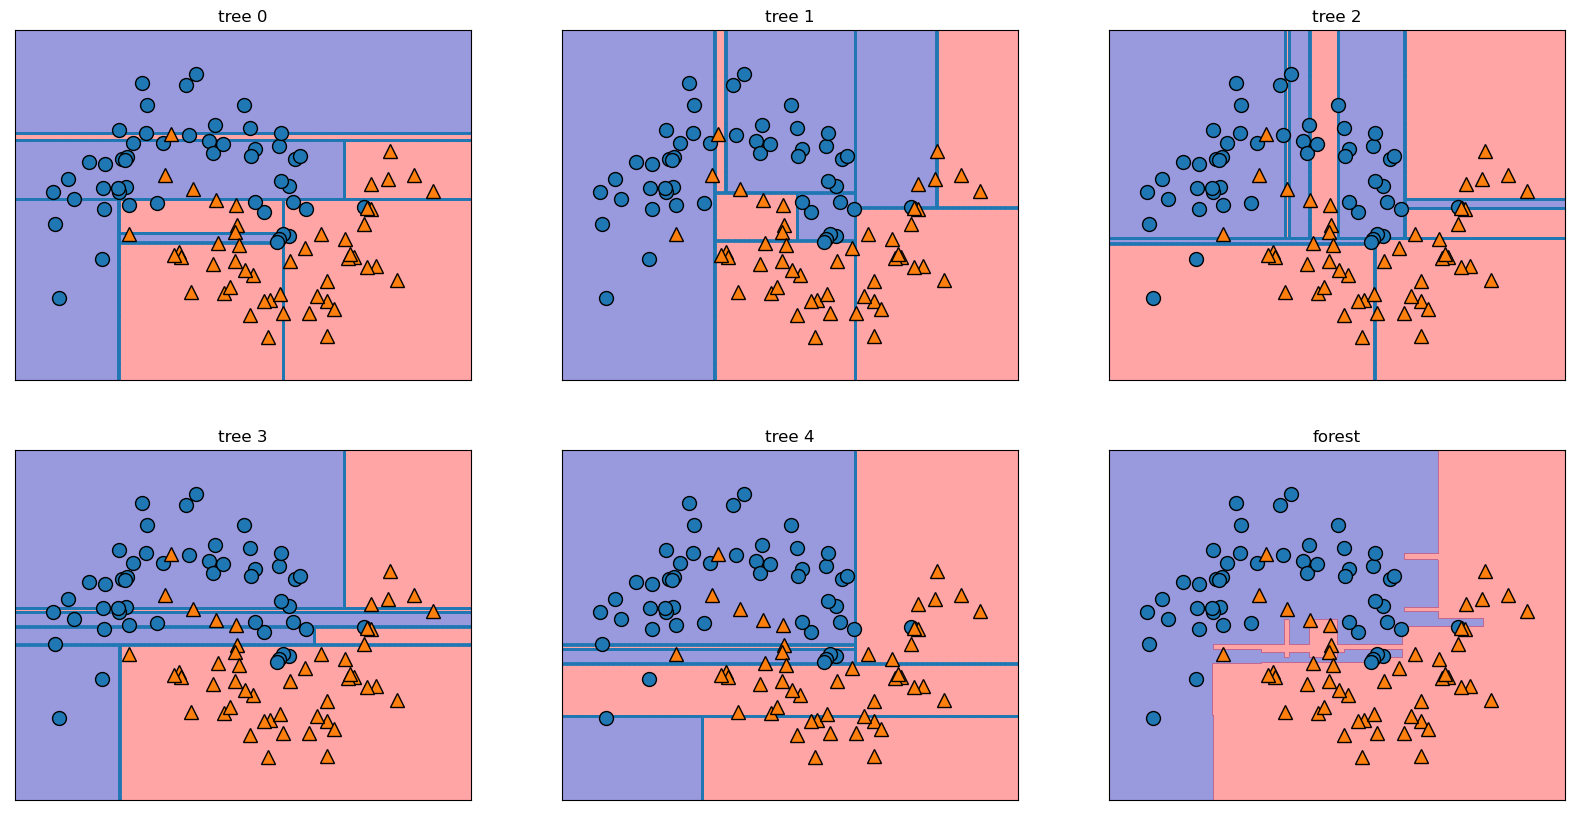

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20,10)) 

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title(f"tree {i}")
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=0.4) 
axes[-1,-1].set_title("forest")
mglearn.discrete_scatter(X[:,0], X[:,1], y)


In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [16]:
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_tr,y_tr)
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.958041958041958


In [17]:
hp = {
    "random_state" : 0,
    "max_features" : "sqrt", # None 을 줄경우 전체피쳐 사용 
    "n_estimators" : 100, # 트리개수 
    "max_depth" : 10,
    "min_samples_split" : 10,
    "min_samples_leaf" : 3,
}

forest = RandomForestClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 0.9882629107981221 / 테스트용 평가지표: 0.958041958041958


## Boosting 

In [18]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [23]:
#오버피팅
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data , cancer.target, stratify=cancer.target, random_state=42
)

In [21]:
gradient = GradientBoostingRegressor(random_state=0).fit(X_tr,y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr,y_tr)} / 테스트용 평가지표: {gradient.score(X_te,y_te)}')

훈련용 평가지표: 0.9954470985502689 / 테스트용 평가지표: 0.8456938110259314


In [24]:
#하이퍼파라미터 적용
hp = {
    "random_state" : 0,
    "max_depth" : 1,
    "n_estimators" : 100
}

gradient = GradientBoostingRegressor(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.8864176486236018 / 테스트용 평가지표: 0.8290914723510503


In [33]:
hp = {
    "random_state" : 0,
    "max_depth" : 1,
    "n_estimators" : 100,
    "learning_rate" : 0.2,
}

gradient = GradientBoostingRegressor(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.9030424533281206 / 테스트용 평가지표: 0.8335348874914779


## XGBoost

In [38]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 31.1 MB/s eta 0:00:00


In [39]:
from xgboost import XGBClassifier,plot_importance
hp={
    "random_state" : 42
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표 : {xgb.score(X_tr,y_tr)} /  테스트용 평가지표: {xgb.score(X_te, y_te)}')

훈련용 평가지표 : 1.0 /  테스트용 평가지표: 0.965034965034965


In [40]:
hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 200, # 수행할 부스팅 단계 수
    "learning_rate": 0.01,
    "min_child_weight": 2,
    "gamma": 1
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')

훈련용 평가지표: 0.9812206572769953 / 테스트용 평가지표: 0.951048951048951


## Light GBM

In [41]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 16.1 MB/s eta 0:00:00


In [42]:
from lightgbm import LGBMClassifier, plot_importance

In [45]:
hp = {
    "random_state" : 42
}

lgb = LGBMClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lgb.score(X_tr, y_tr)} / 테스트용 평가지표: {lgb.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.965034965034965


In [46]:
hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 100,
    "learning_rate": 0.01,
}

lgb = LGBMClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lgb.score(X_tr, y_tr)} / 테스트용 평가지표: {lgb.score(X_te, y_te)}') 

훈련용 평가지표: 0.971830985915493 / 테스트용 평가지표: 0.951048951048951


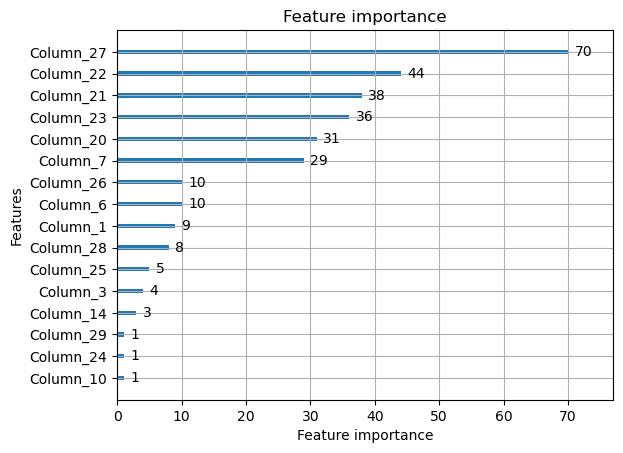

In [47]:
plot_importance(lgb)
plt.show()

## Catboost

In [49]:
!pip install catboost

     --------------------------------------- 74.0/74.0 MB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [50]:
from catboost import CatBoostClassifier

In [51]:
hp = {
    "random_state" : 42,
    "verbose" : 0 # 부스팅 단계 출력 안보이게 하기
}

cat = CatBoostClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {cat.score(X_tr, y_tr)} / 테스트용 평가지표: {cat.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.965034965034965


In [52]:
hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 100, # 수행할 부스팅 단계 수
    "verbose" : 0 # 부스팅 단계 출력 안보이게 하기
}

cat = CatBoostClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {cat.score(X_tr, y_tr)} / 테스트용 평가지표: {cat.score(X_te, y_te)}')

훈련용 평가지표: 0.9882629107981221 / 테스트용 평가지표: 0.965034965034965


## Voting

In [53]:
from sklearn.ensemble import VotingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [54]:
SEED = 42
estimators = [
    ( "mlp" , MLPClassifier(max_iter=1000,random_state=SEED) ),
    ( "lr" , LogisticRegression(random_state=SEED) ),
    ( "rf" , RandomForestClassifier(random_state=SEED) )
]

In [55]:
hp = {
    "estimators" : estimators,
    "voting" : "soft"
}

vot = VotingClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {vot.score(X_tr, y_tr)} / 테스트용 평가지표: {vot.score(X_te, y_te)}')

훈련용 평가지표: 0.9694835680751174 / 테스트용 평가지표: 0.9440559440559441


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
hp = {
    "estimators" : estimators,
    "voting" : "hard"
}

vot = VotingClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {vot.score(X_tr, y_tr)} / 테스트용 평가지표: {vot.score(X_te, y_te)}')

훈련용 평가지표: 0.9647887323943662 / 테스트용 평가지표: 0.9370629370629371


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Stacking

In [57]:
from sklearn.ensemble import StackingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [58]:
SEED = 42
estimators = [
    ( "mlp" , MLPClassifier(max_iter=1000,random_state=SEED) ),
    ( "lr" , LogisticRegression(random_state=SEED) ),
    ( "rf" , RandomForestClassifier(random_state=SEED) )
]

hp = {
    "estimators" : estimators,
    "final_estimator" : LogisticRegression(random_state=SEED)
}

stack = StackingClassifier(**hp,n_jobs=-1).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {stack.score(X_tr, y_tr)} / 테스트용 평가지표: {stack.score(X_te, y_te)}')

훈련용 평가지표: 0.9788732394366197 / 테스트용 평가지표: 0.958041958041958
